# Data Processing notebook (Xan Morice-Atkinson)

The data is always the most important part of any AI method. If you understand your data well you will come up with a model which is both efficient and accurate.

Efficiency comes from both a good model but also and **most importantly** from the appropriate data scaling.

Accuracy comes from both a well chosen model and, much more subtle but even more important, understadning the limits of your training and data, are you trying to apply your model to data where it is not valid? Have you minimised the loss or over- or under-trained?

## Overview:
1. Basics of saving and loading data.
2. Getting data from the internet. *(A demonstration of the 'requests' package which is used to query apis.)*
3. Loading, inspecting, and plotting data.
4. Data manipulation.

TASK:
Explore the fashionMNIST dataset - what sort of data is this, how many labells are there?

### 1. Basics of saving and loading data

In [9]:
# Save data to a file

example_text = "The quick brown fox jumps over the lazy dog."

f = open("myfile.txt", "w")
f.write(example_text)
f.close()

In [10]:
# Load data from file

f = open("myfile.txt", "r")
result = f.read()
f.close()

print(result)

The quick brown fox jumps over the lazy dog.


### 2. Getting data from the internet.

In [11]:
# Imports
import requests
import os
from google.colab import drive
import zipfile

In [12]:
# Get data
req = requests.get("https://archive.ics.uci.edu/static/public/53/iris.zip")

print(req.status_code)

200


In [13]:
# Save data to drive
# Let's use google's inbuilt drive function mount the google drive

drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
data_dir = "/content/drive/Shareddrives/ICG Computing Learning/Courses/UKSA Training Grant/Learning_examples/Resources"

os.listdir(data_dir)

['iris-computer-vision.zip',
 'iris',
 'iris-computer-vision',
 'iris.zip',
 'neural_network_diagram.png',
 'MNIST']

In [15]:
# Save zip file to data_dir

filename = "iris.zip"
full_path_zip = os.path.join(data_dir, filename)

#
with open(full_path_zip, "wb") as f:
  f.write(req.content)

In [16]:
# Unzip file

filename = "iris.zip"
foldername = "iris"
full_path_zip = os.path.join(data_dir, filename)
full_path = os.path.join(data_dir, foldername)

if not os.path.exists(full_path):
  zipfile.ZipFile(full_path_zip).extractall(full_path)

In [17]:
os.listdir(full_path)

['Index', 'bezdekIris.data', 'iris.data', 'iris.names']

# 3. Loading, inspecting, and plotting data.

In [18]:
# Imports

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Load in index

data_dir = "/content/drive/Shareddrives/ICG Computing Learning/Courses/UKSA Training Grant/Learning_examples/Resources"
full_path = os.path.join(data_dir, "iris")

names_path = os.path.join(full_path, "iris.names")

with open(names_path, "r") as f:
  names = f.read()

print(names)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [20]:
# Load in data with numpy

iris_data_path = os.path.join(full_path, "iris.data")

data = np.loadtxt(iris_data_path, delimiter=",", dtype=str)

print(data[0:10])

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']]


In [21]:
# Load in data with pandas

df = pd.read_csv(iris_data_path, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [22]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
# data stats of iris dataset using pandas

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# data stats (count, mean std) of iris dataset grouped by class using pandas

df_grouped = df.groupby("class")

display(df_grouped.describe())

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
class                               ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [25]:
display(df_grouped.describe().transpose())

class               Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

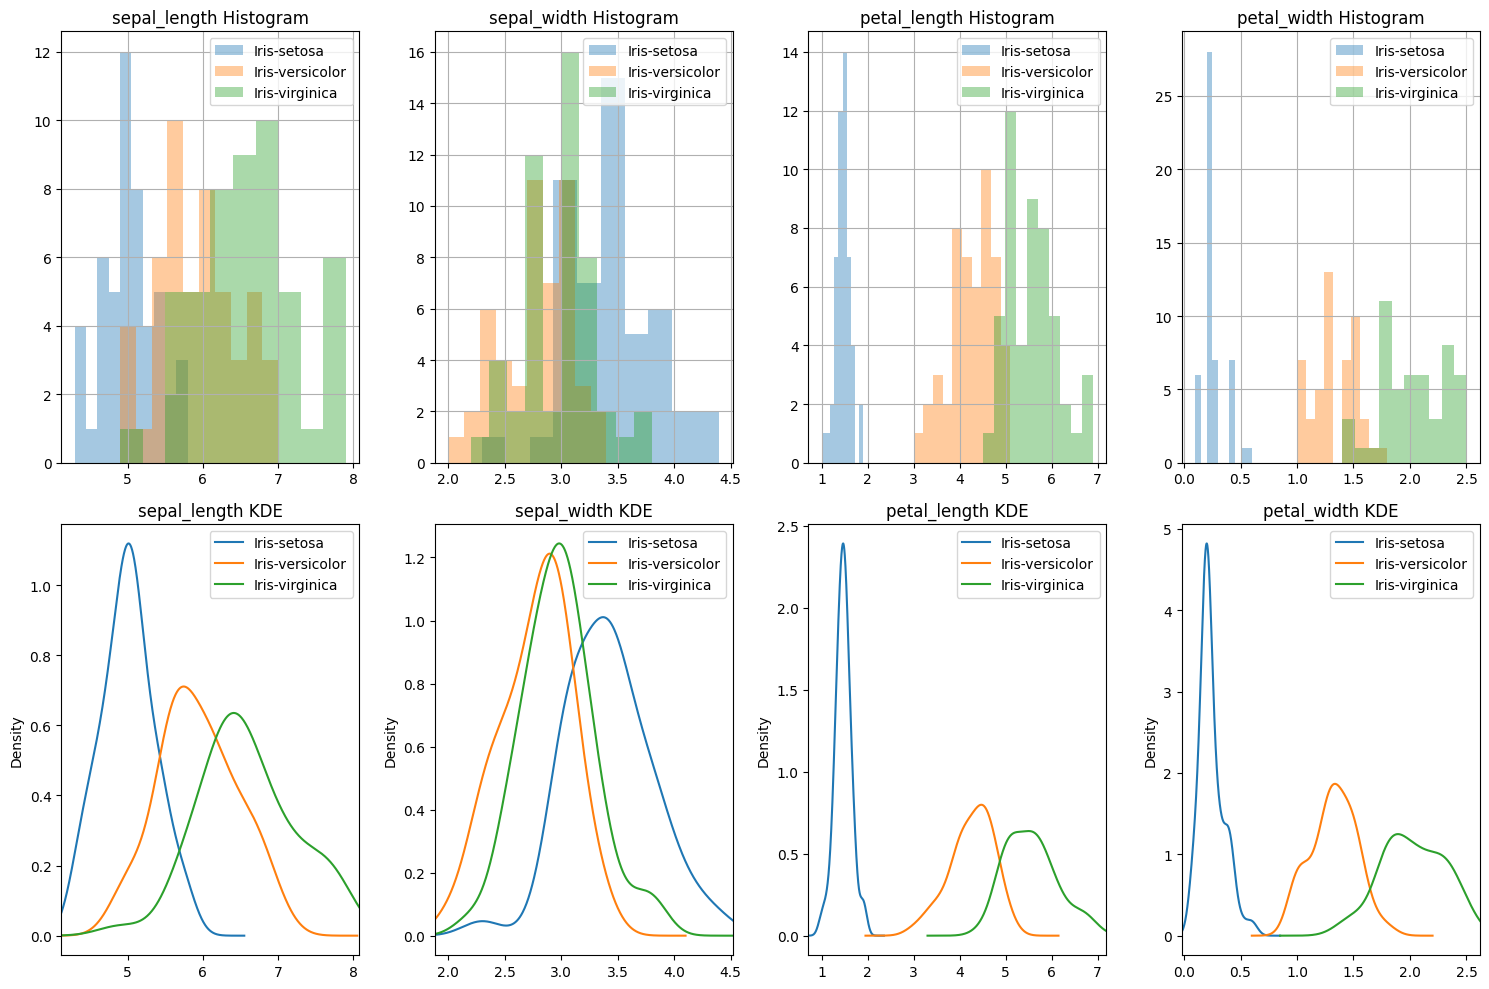

In [26]:
# Plot with pandas

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = df['class'].unique()

# Set up the figure and axis for the subplots
fig, axs = plt.subplots(2, len(features), figsize=(15, 10))

# Loop through each feature
for i, feature in enumerate(features):
    # Get global min and max for consistent x-axis across both plots
    feature_min = df[feature].min()
    feature_max = df[feature].max()

    # Calculate the buffer (5% of the range)
    buffer = 0.05 * (feature_max - feature_min)
    x_min = feature_min - buffer
    x_max = feature_max + buffer

    # Loop through each class
    for c in classes:
        class_data = df[df['class'] == c][feature]

        # Plot histogram
        class_data.hist(alpha=0.4, ax=axs[0, i], label=c)

        # Plot KDE
        class_data.plot(kind='kde', ax=axs[1, i], label=c)

    # Set x-axis limits with buffer
    axs[0, i].set_xlim([x_min, x_max])
    axs[1, i].set_xlim([x_min, x_max])

    # Set titles for each feature
    axs[0, i].set_title(f'{feature} Histogram')
    axs[1, i].set_title(f'{feature} KDE')

# Add legends to the plots
for ax in axs.flat:
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


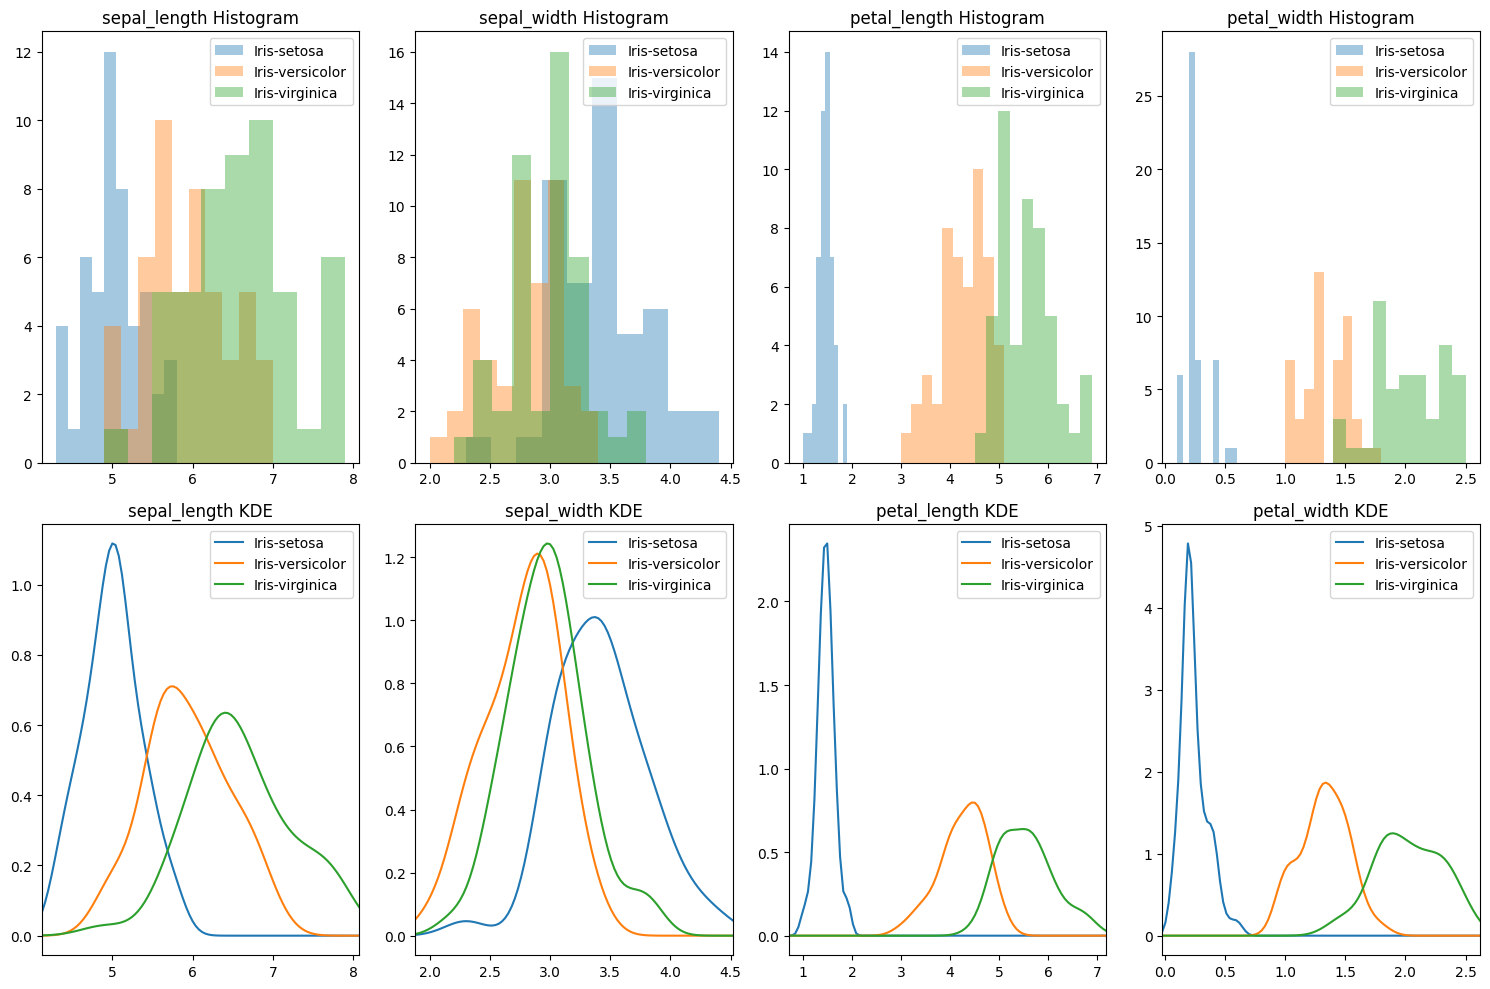

In [27]:
# Plots with numpy

# Convert the DataFrame columns to NumPy arrays
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
class_labels = df['class'].unique()

# Create NumPy arrays for each feature and the class labels
data = df[features].values
labels = df['class'].values

# Set up the figure and axis for subplots
fig, axs = plt.subplots(2, len(features), figsize=(15, 10))

# Loop through each feature
for i, feature in enumerate(features):
    # Get global min and max for consistent x-axis across both plots
    feature_min = data[:, i].min()
    feature_max = data[:, i].max()

    # Calculate the buffer (5% of the range)
    buffer = 0.05 * (feature_max - feature_min)
    x_min = feature_min - buffer
    x_max = feature_max + buffer

    # Loop through each class
    for class_label in class_labels:
        class_data = data[labels == class_label, i]

        # Plot the histogram on the top row of subplots (axs[0])
        axs[0, i].hist(class_data, alpha=0.4, label=class_label)

        # Calculate and plot the KDE on the bottom row (axs[1])
        kde = gaussian_kde(class_data)
        x_vals = np.linspace(x_min, x_max, 100)
        axs[1, i].plot(x_vals, kde(x_vals), label=class_label)

    # Set x-axis limits with buffer
    axs[0, i].set_xlim([x_min, x_max])
    axs[1, i].set_xlim([x_min, x_max])

    # Set titles for each feature
    axs[0, i].set_title(f'{feature} Histogram')
    axs[1, i].set_title(f'{feature} KDE')

# Add a legend to each subplot
for ax in axs.flat:
    ax.legend()

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()


### What about loading the Iris images?

The code below loads a random Iris image from the dataset we mounted before.

/content/drive/Shareddrives/ICG Computing Learning/Courses/UKSA Training Grant/Learning_examples/Resources/iris-computer-vision/iris-virginica


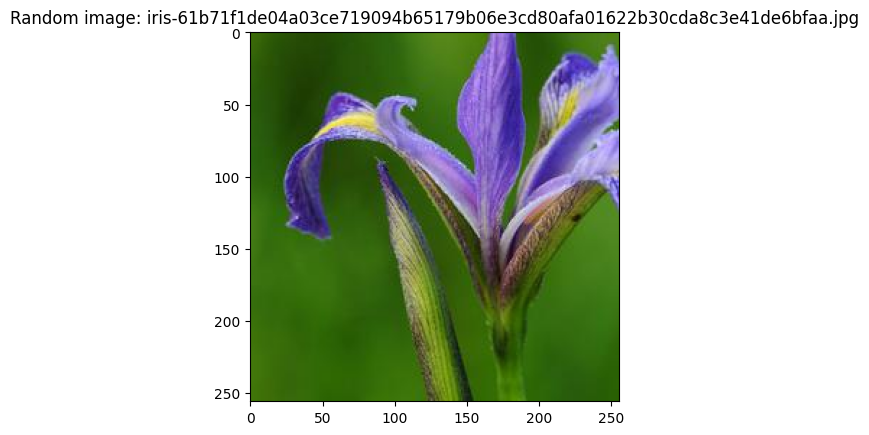

In [29]:
# load a random iris image to use as an example to show data augmentation

import random
import matplotlib.image as mpimg

def load_and_show_random_image(folder_path): # we've put it in a function as it might be the sort of thing we want to call a few times

  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))] # looking in our folders to create a list of image full path names
  if not image_files:
    print(f"No image files found in {folder_path}")
    return

  random_image_file = random.choice(image_files) # selecting a random image
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = mpimg.imread(image_path) # read in the image using matplotlib - there are numerous way in many packages to do this
    plt.imshow(img) # plot the image
    plt.title(f"Random image: {random_image_file}")
    plt.show()
  except Exception as e:
    print(f"Error loading or displaying image: {e}")


# this is now the main part of our code outside of our function
test_image_path = "/content/drive/Shareddrives/ICG Computing Learning/Courses/UKSA Training Grant/Learning_examples/Resources/iris-computer-vision/iris-virginica"
print(test_image_path)

load_and_show_random_image(test_image_path)

# TASK

Now we want to try to explore the fashionMNIST dataset

What sort of data is this?
What are the dimensions of the images?
How many unique labels are there?
What do the data distributions look like?
What about the pixel distributions from within the images?

We will help to get you started with downloading the data - then you take over and explore.

In [40]:
import torch
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

What does the data look like? Let's try printing a tiny bit of it.


In [41]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

It is a bunch of arrays which must define an image (or data or some dimension - this is the pytorch tensor) and a number '9' - this must be a label - let's separate them out so we can explore some more.

In [47]:
arrays, label=train_data[0]

In [49]:
print(label)
print(arrays.shape)

9
torch.Size([1, 28, 28])


Now let's convert that tensor to a numpy array as its easier to manipulate and explore

In [51]:
numpy_array = arrays.numpy()
print(numpy_array.shape)

(1, 28, 28)


So let's guess this is a 28 by 28 image which has an extra dimension out front as the full dataset is many of these stacked. Let's plot the 28x28 image part.

(28, 28)


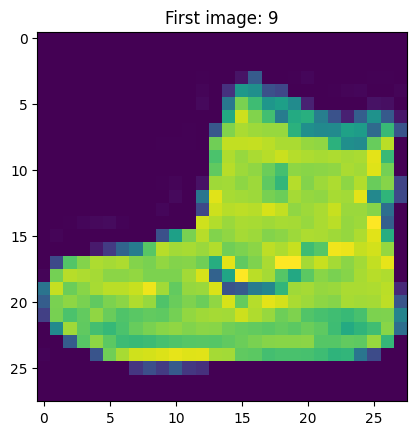

In [53]:
first_image=numpy_array.squeeze()

print(first_image.shape)

plt.imshow(first_image) # plot the image
plt.title(f"First image: {label}") # using the label as a title
plt.show()

Its a boot! Can you plot each of the labels and plot the distribution of how many there are in the dataset?